# **Problem Statement**

In the realm of business management, people managers and HR personnel grapple with a multitude of challenges. One of the most pressing issues among them is **attrition**, which stands out as a matter of paramount importance. For organizations committed to fostering a stable and engaged workforce, it is imperative to comprehend attrition rates and the underlying drivers of employee turnover.

Hence, the primary aim of this research is to employ HR Analytics techniques for the purpose of detecting and investigating trends related to individuals that are intricately connected to **attrition**. Through a meticulous examination of the data, we endeavor to unveil the complex elements associated with attrition rates. These elements encompass various aspects, including ***employee demographics, performance metrics, levels of job satisfaction, and potential indicators of voluntary employee departures***.

This comprehensive analysis is geared toward furnishing organizations with invaluable insights. These insights empower them to proactively tackle attrition challenges and implement targeted strategies to mitigate turnover. By harnessing HR Analytics to uncover trends in the realm of people management concerning attrition rates and associated factors, organizations can strive to achieve improved employee retention, heightened productivity, and enduring success in the business arena.

# **1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
pd.options.display.float_format = '{:.2f}'.format

# **2. Loading Dataset**

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/triangle836/DB61_Python_final_term_project/main/HR-Employee-Attrition.csv")

In [4]:
print(f"Shape of the dataset: {data.shape}")

Shape of the dataset: (1470, 35)


In [5]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


## 2.1. Dataset Description

***About the Data***

This dataset was discovered on Kaggle and is openly accessible. There are 35 variables and 1,470 employee records. On the internet, projects involving HR analytics are fairly common with this data collection. The purpose of this data collection is to develop a model to forecast employees who are likely to quit based on the information about these 1,470 employees and the following characteristics:

* Age : Age in years of the employee
* Attrition: People who people leave
* BusinessTravel : How often an employee embark on a job related travel
* DailyRate : Daily rate at which an employee is paid
* Department : Department where the employee works
* DistanceFromHome : Distance an employee travels from home to work
* Education : Level of education of the employee
* EducationField : What field the employee studied in school
* EmployeeCount : Count of employee
* EmployeeNumber : EMployee number
* EnvironmentSatisfaction : Employee environment satisfaction
* Gender : Gender of the employee
* HourlyRate : Hourly rate of pay of the employee
* JobInvolvement : Employee job involvement ratings
* JobLevel : Employee Job level
* JobRole : Employee Job role
* JobSatisfaction : Employee Job Staisfaction
* MaritalStatus : Employee Marital Status
* MonthlyIncome : Employee monthly income
* MonthlyRate : Employee Monthly rate
* NumCompaniesWorked : Number of companies the person have worked in the past
*  Over18 : Age over 18 years or not
*  OverTime : Work overtime
*  PercentSalaryHike : Salary increment in Percentages
* PerformanceRating : Performance rating
*  RelationshipSatisfaction : Relationship satisfaction
*  StandardHours : Employee standard hours worked
*  StockOptionLevel Stock options level
*  TotalWorkingYears Total working hours
*  TrainingTimesLastYear : Total working years
*  WorkLifeBalance : Work life balance rating
*  YearsAtCompany : Years at the company
*  YearsInCurrentRole : Years in current role
*  YearsSinceLastPromotion : Years since last promotion
*  YearsWithCurrManager : Years with current manager      

# **3. Data Cleaning**

## 3.1 Basic data discovery

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.00,36.92,9.14,18.00,30.00,36.00,43.00,60.00
DailyRate,1470.00,802.49,403.51,102.00,465.00,802.00,1157.00,1499.00
DistanceFromHome,1470.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,1470.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,1470.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,1470.00,1024.87,602.02,1.00,491.25,1020.50,1555.75,2068.00
EnvironmentSatisfaction,1470.00,2.72,1.09,1.00,2.00,3.00,4.00,4.00
HourlyRate,1470.00,65.89,20.33,30.00,48.00,66.00,83.75,100.00
JobInvolvement,1470.00,2.73,0.71,1.00,2.00,3.00,3.00,4.00
JobLevel,1470.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1470 entries, 0 to 1469

Data columns (total 35 columns):

 #   Column                    Non-Null Count  Dtype 

---  ------                    --------------  ----- 

 0   Age                       1470 non-null   int64 

 1   Attrition                 1470 non-null   object

 2   BusinessTravel            1470 non-null   object

 3   DailyRate                 1470 non-null   int64 

 4   Department                1470 non-null   object

 5   DistanceFromHome          1470 non-null   int64 

 6   Education                 1470 non-null   int64 

 7   EducationField            1470 non-null   object

 8   EmployeeCount             1470 non-null   int64 

 9   EmployeeNumber            1470 non-null   int64 

 10  EnvironmentSatisfaction   1470 non-null   int64 

 11  Gender                    1470 non-null   object

 12  HourlyRate                1470 non-null   int64 

 13  JobInvolvement            1470 non-null   int64 

 14  JobLe

In [8]:
## Standardize column names

import re
data.columns = [re.sub(r'(?<=[a-z])([A-Z])', r'_\1',i).lower() for i in data.columns]

In [9]:
data.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over18', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

## 3.2. Check missing values and Dropping unnecessary columns

In [10]:
def check(data):
    list=[]
    for col in data.columns:
        columns = data.columns
        dtype = data[col].dtypes
        instances = data[col].count()
        unique = data[col].nunique()
        sum_null = data[col].isnull().sum()
        duplicates = data[col].duplicated().sum()
        list.append([dtype,instances,unique,sum_null,duplicates])
    data_check = pd.DataFrame(list,columns=["dtype","instances","unique","sum_null","duplicates"],index=data.columns)
    return data_check

check(data)

,dtype,instances,unique,sum_null,duplicates
age,int64,1470,43,0,1427
attrition,object,1470,2,0,1468
business_travel,object,1470,3,0,1467
daily_rate,int64,1470,886,0,584
department,object,1470,3,0,1467
distance_from_home,int64,1470,29,0,1441
education,int64,1470,5,0,1465
education_field,object,1470,6,0,1464
employee_count,int64,1470,1,0,1469
employee_number,int64,1470,1470,0,0


In [11]:
data.duplicated().any()

False

In [12]:
def check_unique(data):
    nunique=data.apply(lambda col: col.nunique())
    unique_values = data.apply(lambda col: col.unique())
    data_check = pd.DataFrame({'uni_count': nunique, 'unique_values': unique_values})
    return data_check

check_unique(data)

,uni_count,unique_values
age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
attrition,2,"[Yes, No]"
business_travel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
daily_rate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
department,3,"[Sales, Research & Development, Human Resources]"
distance_from_home,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
education,5,"[2, 1, 4, 3, 5]"
education_field,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
employee_count,1,[1]
employee_number,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


**Data is cleaned and have no missing value.**

Since the number of columns are overwhelming, it is plausible to retain the most crucial valuesets in relation to our analytical purposes.

- "employee_count", "over18" and "standard_hours" columns consist of 1 value only for all entries, so they can be omitted.
- "employee_number" is employee ID, which is unique for each entry, so it can also be omitted as it provides no characteristic of the employee.
- "performance_rating" consists of merely 2 values (3 and 4), suggesting its appreciable value in this analytical process.

In [13]:
data.drop(['employee_count','employee_number','standard_hours','over18','performance_rating'],
            axis=1,inplace=True
            )

## 3.3. Removing Outliers

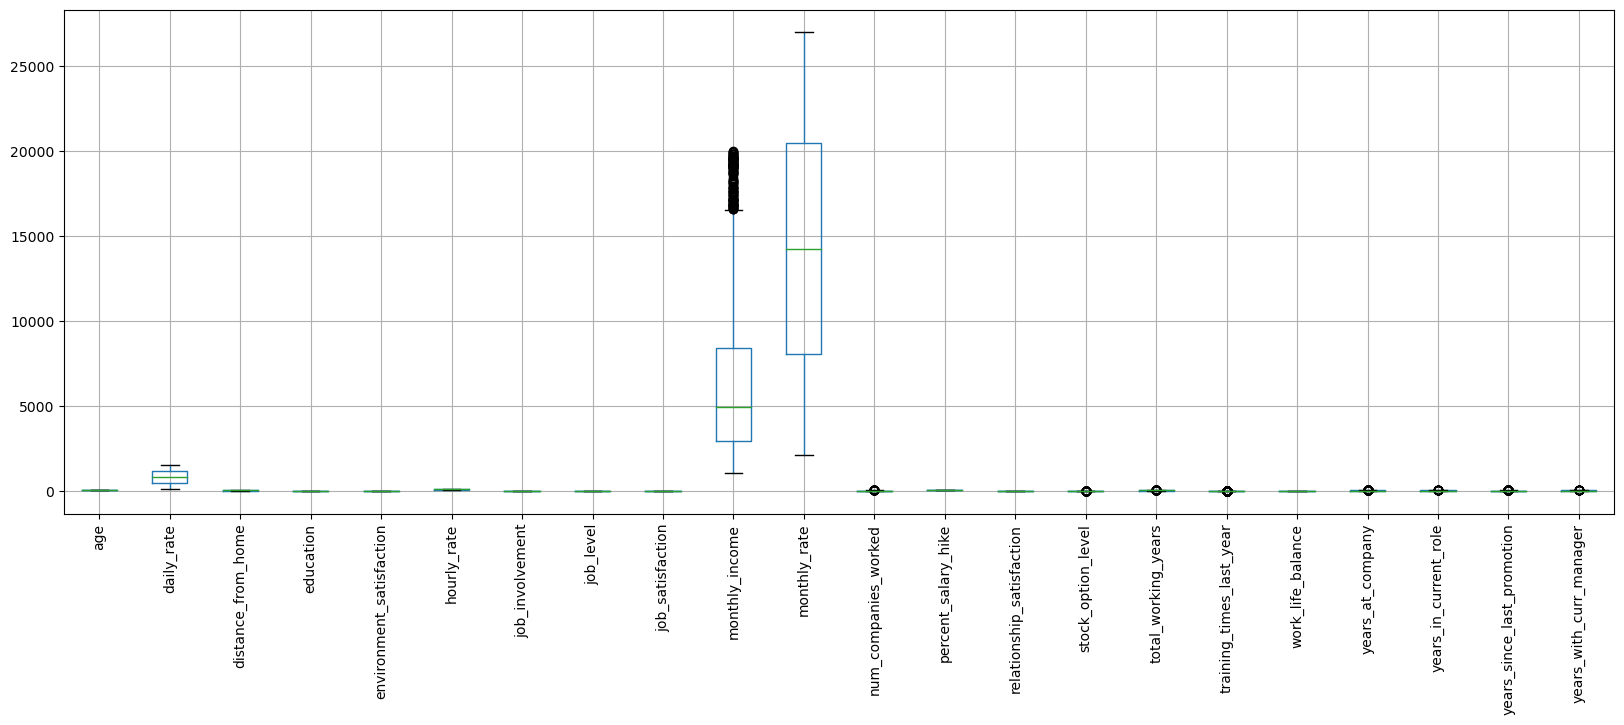

In [14]:
data.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

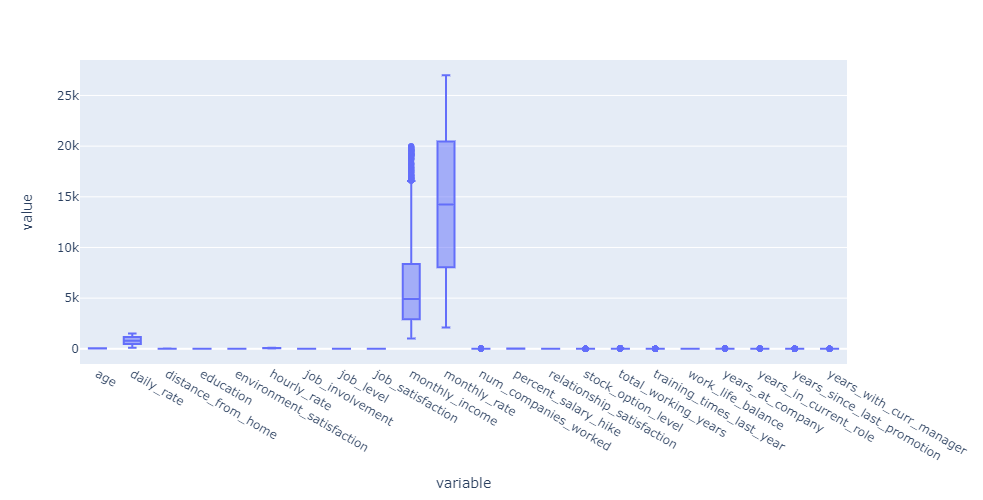

In [15]:
fig = px.box(data_frame=data.select_dtypes(include=np.number),orientation="v")
fig.update_layout(
    width=1000,  # Set the width in inches
    height=500   # Set the height in inches
)

In [16]:
outliers = {}

for col in data.select_dtypes(include=np.number).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers[col] = col_outliers


print("Summary Statistics for HR attributes:")
print(tabulate(data.describe(), headers='keys', tablefmt='pretty'))

for col, outlier_data in outliers.items():
    if len(outlier_data) == 0:
      continue
    else:
      print(f"Outliers in {col}:", len(outlier_data))
      print(tabulate(outlier_data.head(), headers='keys', tablefmt='pretty'))


Summary Statistics for HR attributes:

+-------+--------------------+--------------------+--------------------+--------------------+--------------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+----------------------+---------------------+---------------------------+--------------------+---------------------+--------------------------+--------------------+--------------------+-----------------------+----------------------------+-------------------------+

|       |        age         |     daily_rate     | distance_from_home |     education      | environment_satisfaction |    hourly_rate     |  job_involvement   |     job_level      |  job_satisfaction  |  monthly_income   |    monthly_rate    | num_companies_worked | percent_salary_hike | relationship_satisfaction | stock_option_level | total_working_years | training_times_last_year | work_life_balance  |  years_at_company  | years_in_current_ro

- There are outliers in some columns, but either the number of outliers is small (\<5\%) or the outliers values are in realistic, reasonable range. Except for **"monthly_income"** column.

In [17]:
drop_outlier_col = ['monthly_income']

for col in drop_outlier_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    new_df = data[(data[col]>=lower_bound)&(data[col]<=upper_bound)]

In [18]:
new_df = new_df.reset_index(drop=True)
print(f"Shape of the dataset after cleanning: {new_df.shape}")

Shape of the dataset after cleanning: (1356, 30)


# **4. EDA & Data Visualization**

## 4.1. Heatmap Correlation

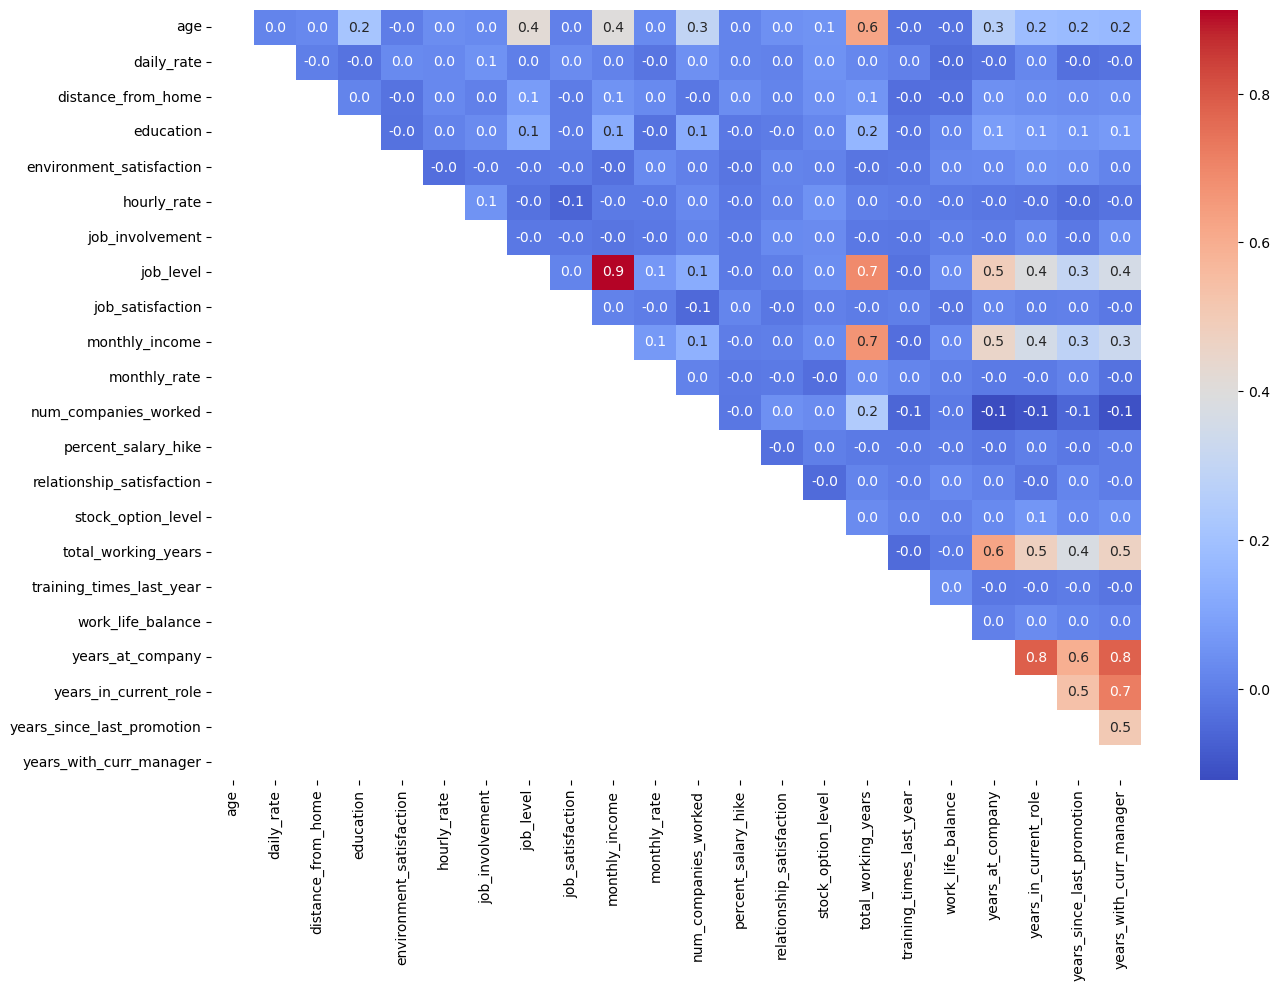

In [19]:
def mask_upper_triangle(matrix):
    mask = np.tri(matrix.shape[0], k=0, dtype=bool)
    matrix[mask] = np.nan
    return matrix

plt.figure(figsize=(15,10))

sns.heatmap(mask_upper_triangle(new_df.corr()),annot=True,fmt=".1f",cmap="coolwarm",mask=False)
#plt.xticks(rotation=60)
plt.show()

In [20]:
correlation_matrix = new_df.corr()

threshold = 0.5
high_correlation_df = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]
high_correlation_df

,age,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
age,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,NaN,NaN,NaN,NaN
daily_rate,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_from_home,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environment_satisfaction,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hourly_rate,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_involvement,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,0.91,NaN,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN
job_satisfaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.67,NaN,NaN,NaN,NaN,NaN,NaN


The heatmap displays strong correlation coefficient values among ***education, age, job_level, monthly_income, num_companies_worked, years_at_company, years_in_current_role, years_since_last_promotion and years_with_curr_manager columns.***

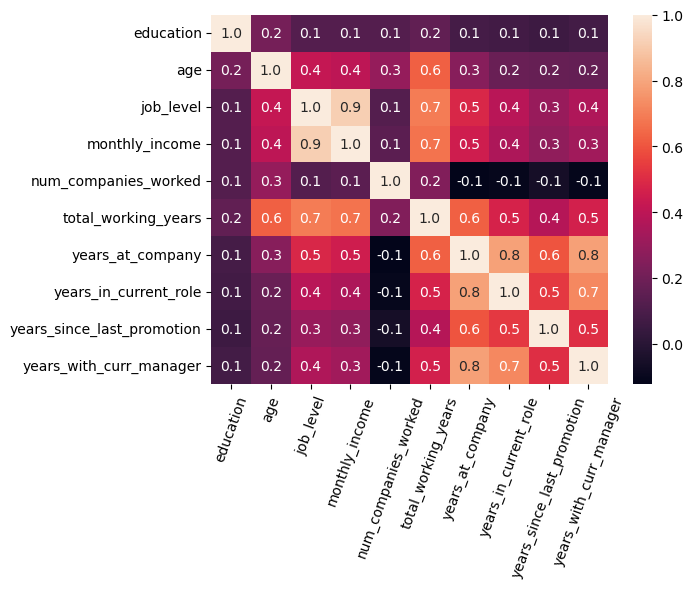

In [21]:
columns = ['education',
          'age',
          'job_level',
          'monthly_income',
          'num_companies_worked',
          'total_working_years',
          'years_at_company',
          'years_in_current_role',
          'years_since_last_promotion',
          'years_with_curr_manager'
          ]

sns.heatmap(new_df[columns].corr(),annot=True, fmt=".1f")
plt.xticks(rotation=70)
plt.show()

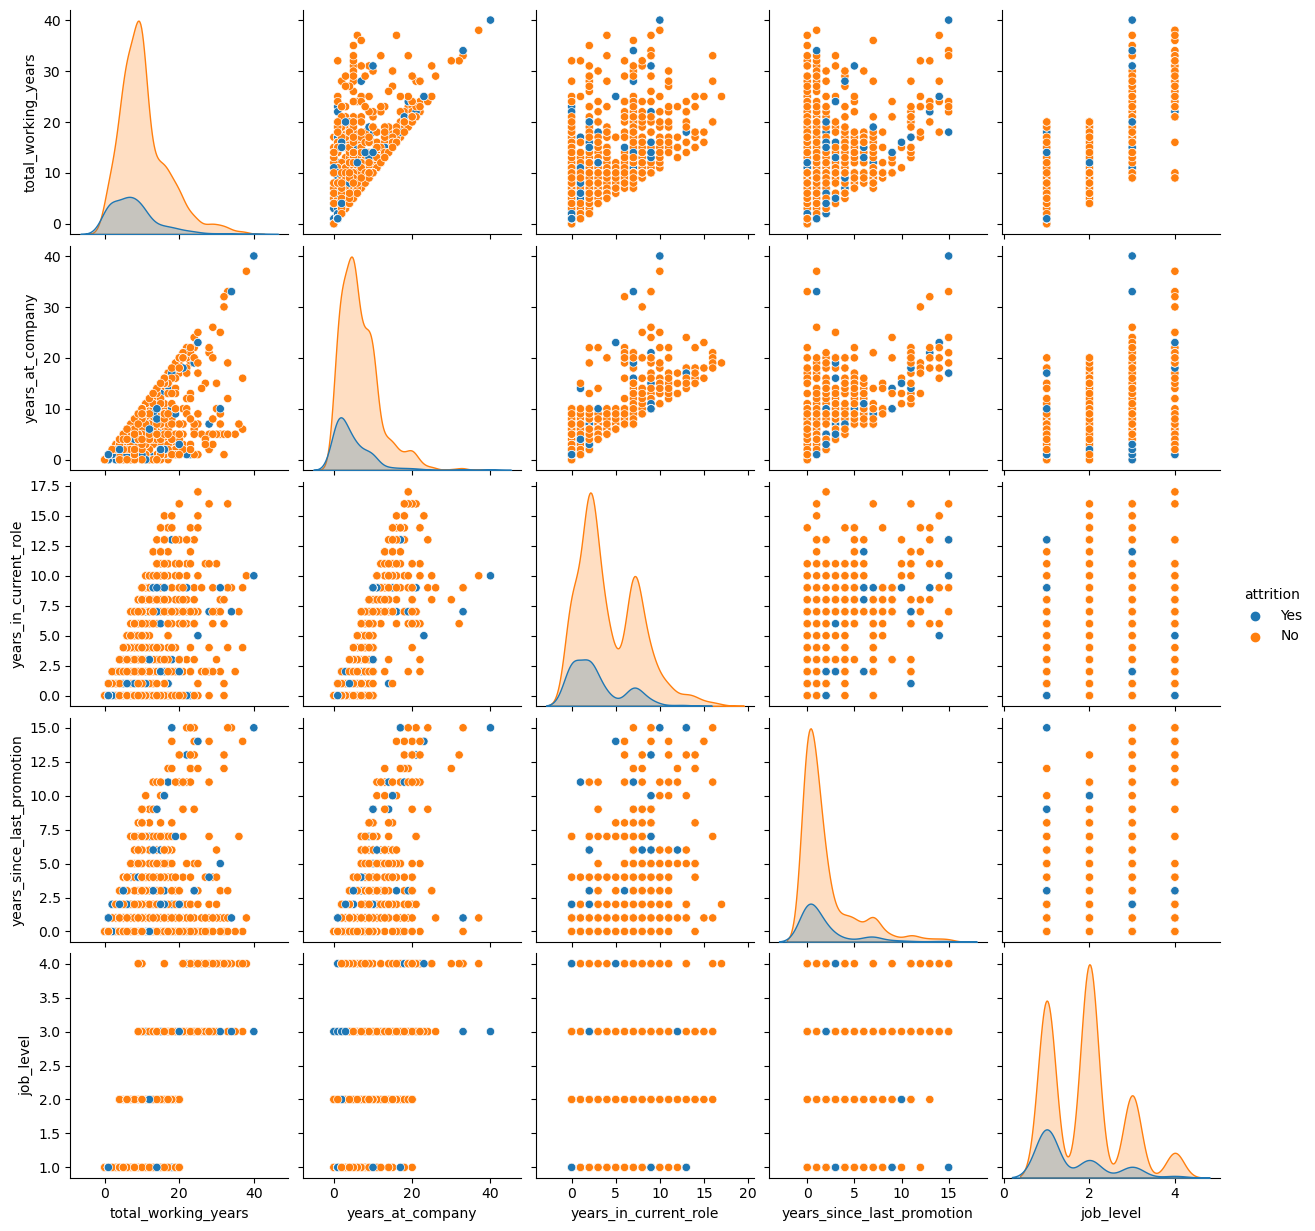

In [22]:
cols = ['total_working_years','years_at_company','years_in_current_role','years_since_last_promotion','attrition','job_level']
sns.pairplot(new_df[cols], hue='attrition')

## 4.2. Feature Analysis

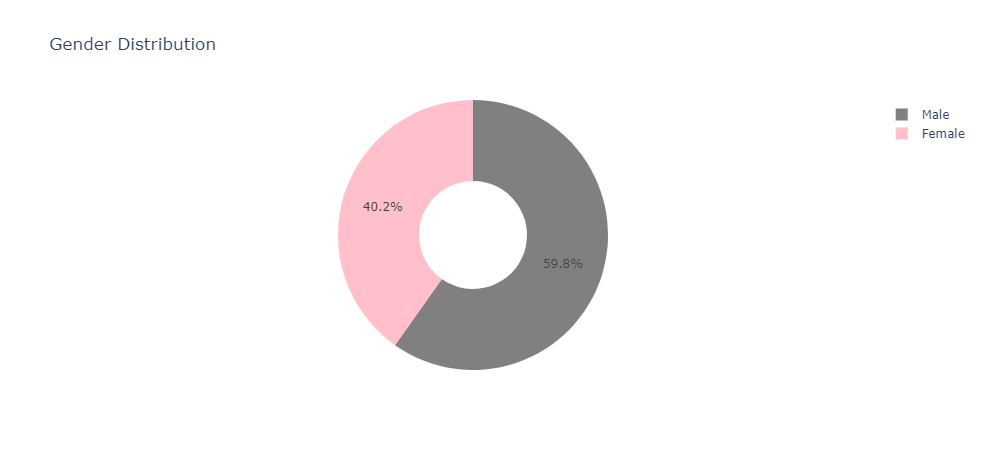

In [23]:
px.pie(new_df,names="gender",title="Gender Distribution",hole=0.4,color_discrete_sequence=["grey", "pink"])

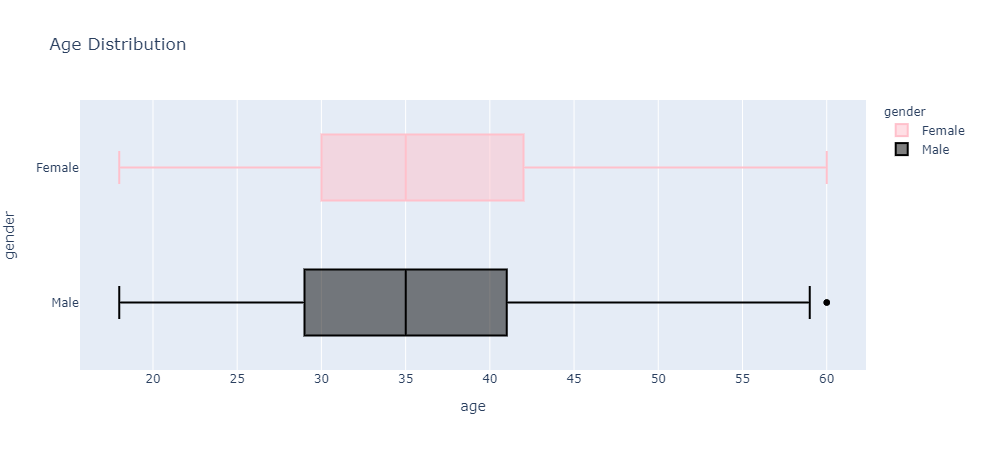

In [24]:
px.box(new_df,x="age", y = 'gender', title="Age Distribution", color="gender", color_discrete_sequence=["pink", "black"])

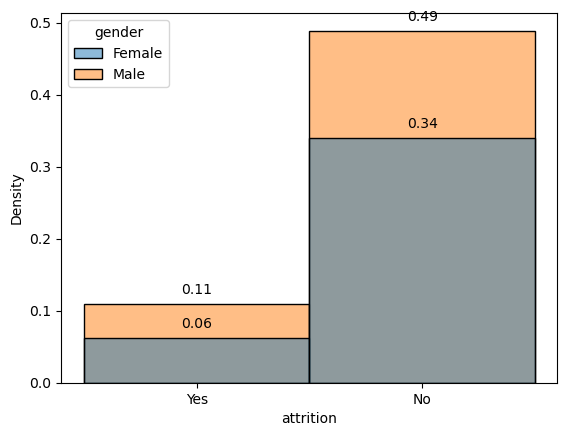

In [25]:
ax=sns.histplot(data=new_df,x="attrition",stat="density",hue="gender")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0,10), textcoords='offset points')

plt.show()

It can be seen that 60% of the research population is male, against 40% females. Both groups have the same distribution in age, ranging from 18 - 60.

The rate of attrition between male and female employees stays roughly the same at 15%.

**This prove the data is not bias.**

### 4.2.1. Correlation of Career Background

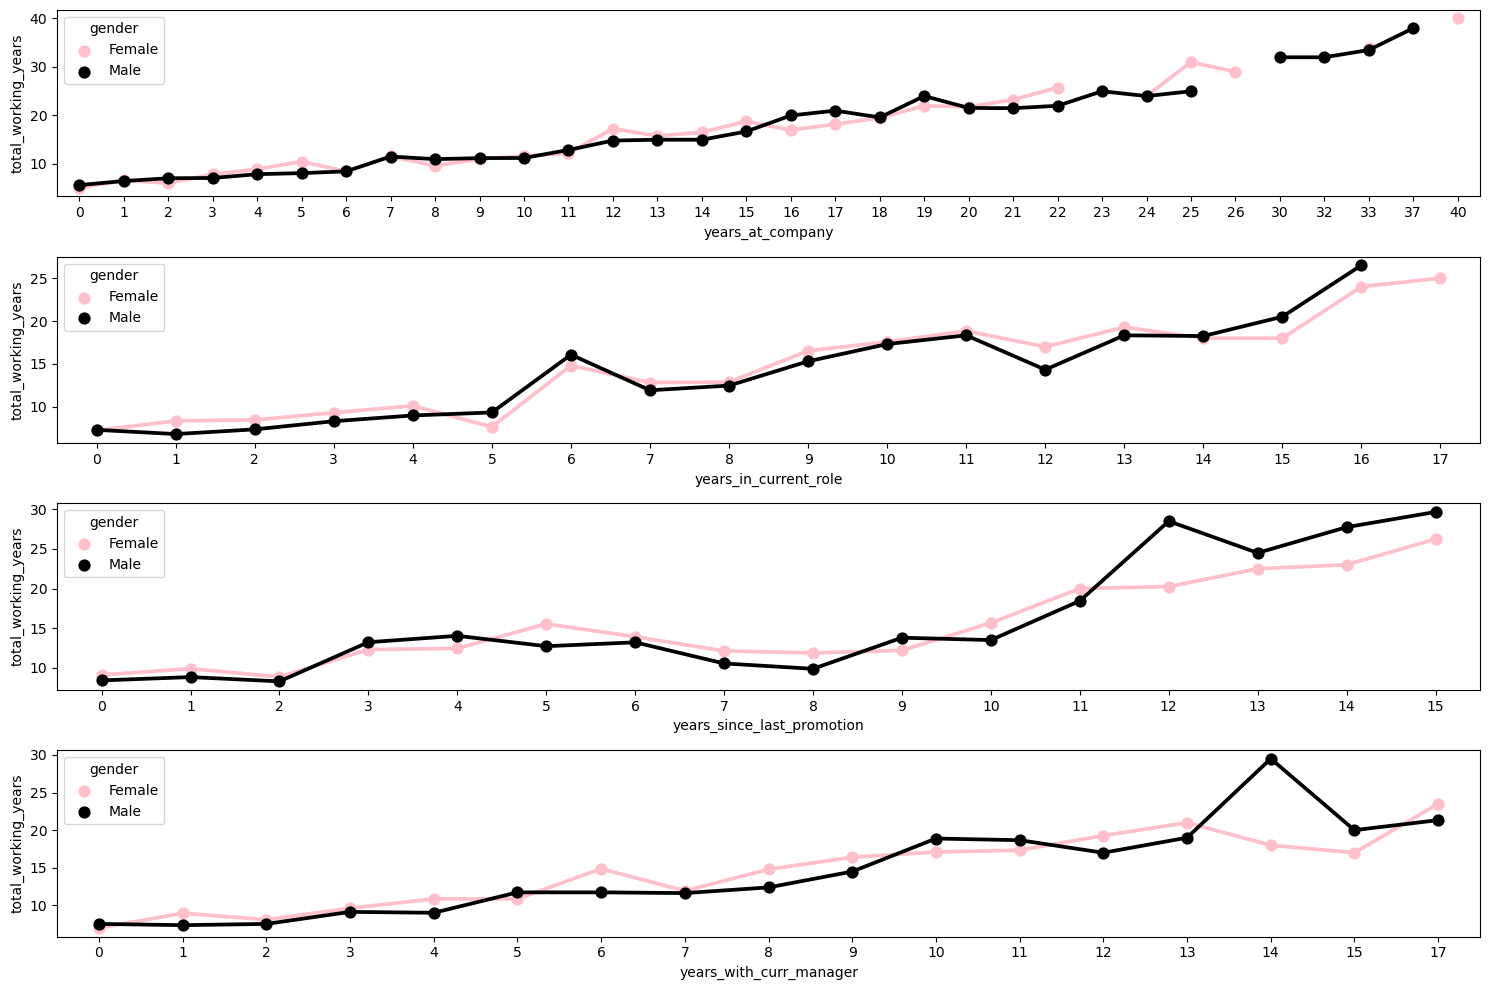

In [26]:
columns = ["years_at_company","years_in_current_role","years_since_last_promotion","years_with_curr_manager"]

fig,axes= plt.subplots(nrows=4,ncols=1,figsize=(15,10))
plt.subplots_adjust(wspace=1, hspace=0.5)

for i,col in enumerate(columns):
    sns.pointplot(x=new_df[col],y=new_df["total_working_years"],hue=new_df["gender"],ax=axes[i],ci=False,palette=['pink','black'])
    axes[i].tick_params(axis='x')
    axes[i].tick_params(axis='y')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("total_working_years")
plt.tight_layout()
plt.show()

As the graph and correlation heatmap suggest, the employee's total working years closely correlated to the number of years working at the current company and position. There is little to no difference between male and female counterparts.

### 4.2.2. Monthly Income correlation

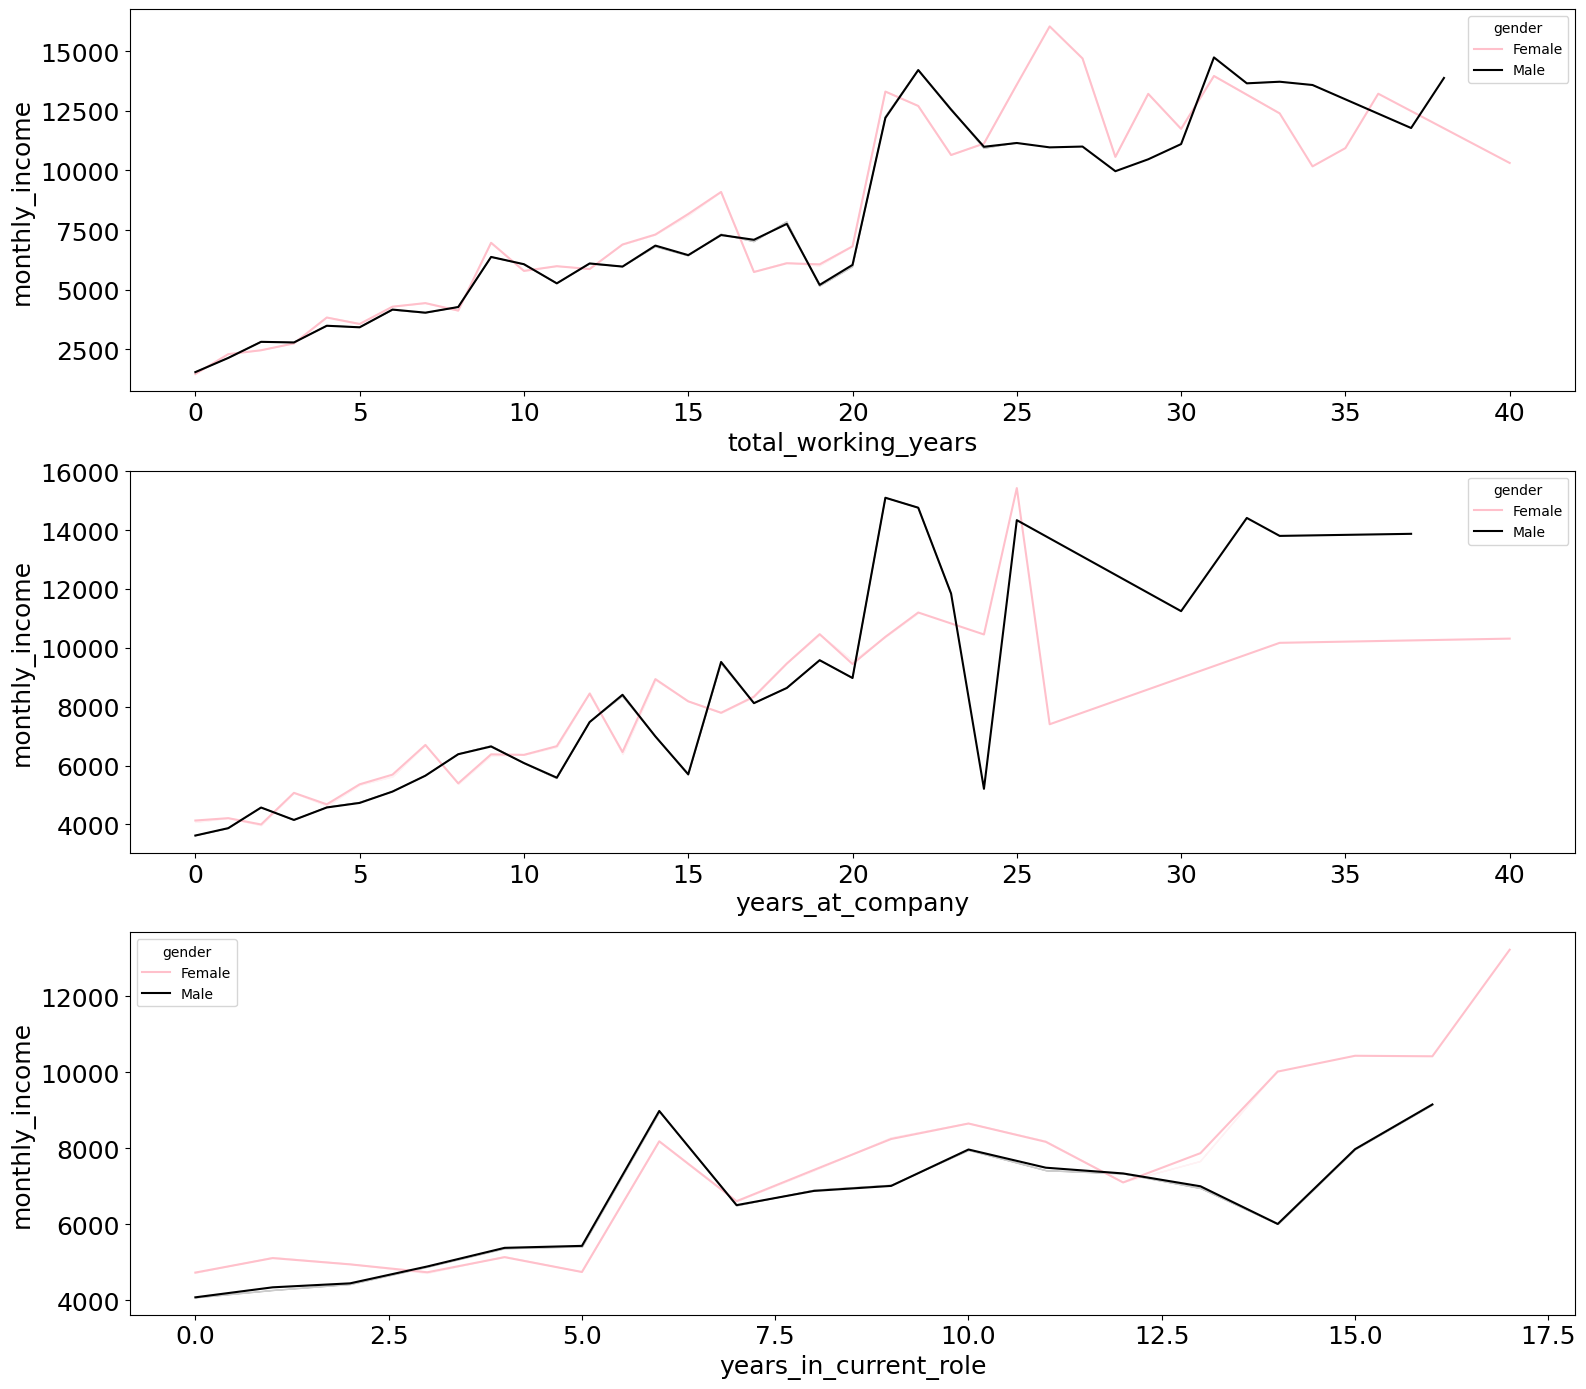

In [27]:
columns=['total_working_years','years_at_company','years_in_current_role',]
fig,axes= plt.subplots(nrows=3,ncols=1,figsize=(16,14))
plt.subplots_adjust(wspace=1, hspace=0.5)

for i,col in enumerate(columns):
    sns.lineplot(x=new_df[col],y=new_df["monthly_income"],hue=new_df["gender"],ax=axes[i],ci=False,palette=['pink','black'])
    axes[i].tick_params(axis='x', labelsize=18)
    axes[i].tick_params(axis='y', labelsize=18)

    axes[i].set_xlabel(col,fontsize=18)
    axes[i].set_ylabel("monthly_income",fontsize=18)
plt.tight_layout()
plt.show()

It can be inferred that there is a linear correlation between monthly income to total working years and years worked at the company, but only from 0 - 20 years.

Income jumps up at the mark of 20 working years or more and fluctuate volatilely from then on.

However, the data prove that the more one works in 1 role, the more they would earn monthly.

### 4.2.3. Attrition Univariate Analysis - Correlation

**ATTRITION - AGE**

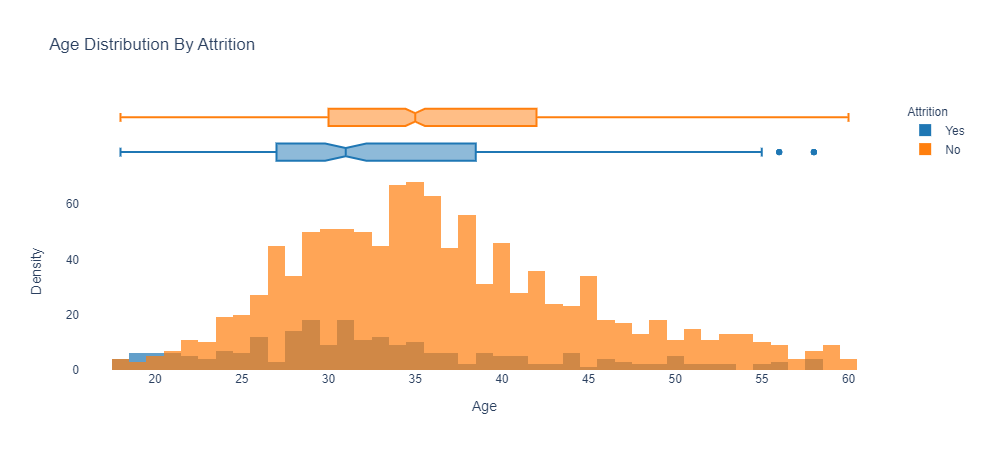

In [28]:
fig = px.histogram(
    new_df,x="age",color="attrition",
    title="Age Distribution By Attrition",labels={"age": "Age"},template="plotly",
    opacity=0.7,barmode="overlay",color_discrete_sequence=["#1f77b4", "#ff7f0e"],histnorm="density",marginal="box"
)

fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Density",
    legend_title="Attrition",
    showlegend=True,
    font={"family":"Arial", "size":12},
    plot_bgcolor="white",
)


fig.show()

It is noticeable that the age range of 25 to 35 stands out with the most remarkable attrition rate, indicating a higher tendency of voluntary exits among all brackets. Conversely, from around 40 onwards, a downtrend was recorded, suggesting a reduced likelihood for departures. Similarly, a declining trend manifests itself starkly from the age of 25 downwards, which can most likely attributed to the probation period or introductory time span for the company.


**ATTRITION - MARITAL STATUS**

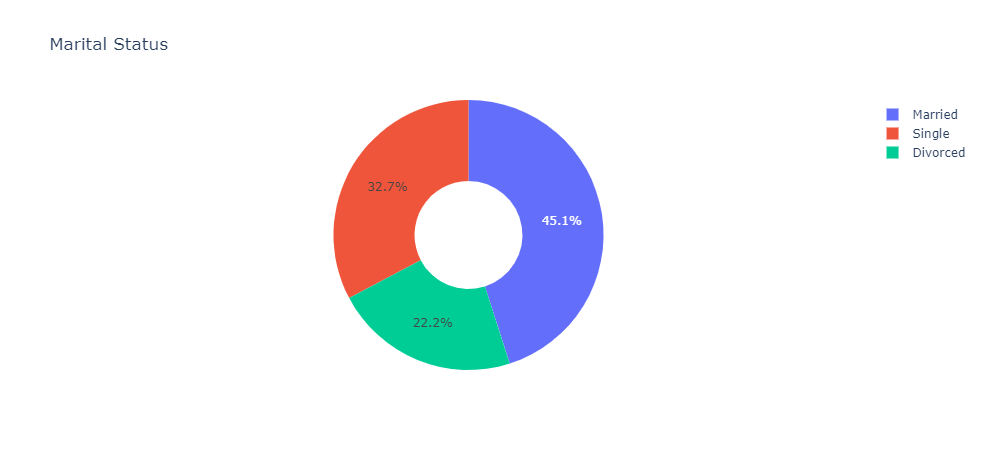

In [29]:
px.pie(new_df,names="marital_status",title="Marital Status", hole=0.4)


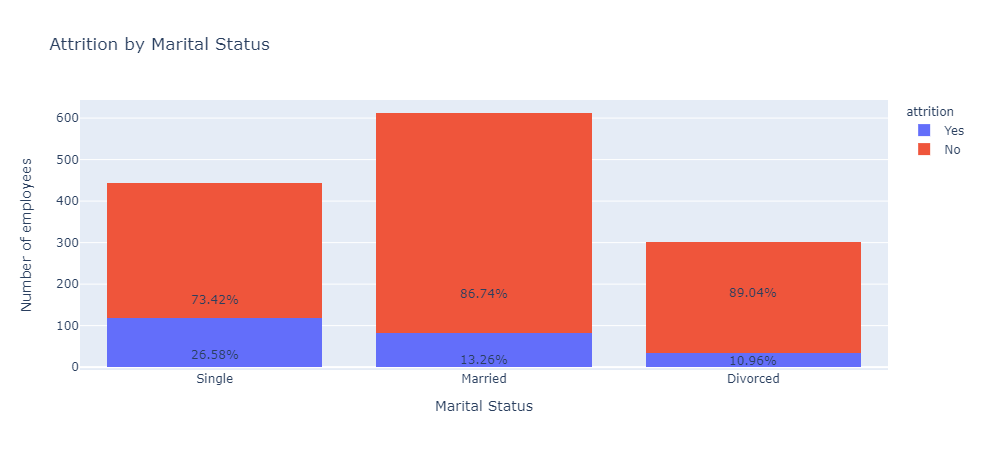

In [30]:
fig = px.histogram(new_df, x='marital_status', color='attrition', title='Attrition by Marital Status',
                   barmode="stack")

percentages = new_df.groupby(['marital_status', 'attrition']).size() / new_df.groupby('marital_status').size() * 100
for marital_status, attrition, percentage in percentages.reset_index().values:
    if attrition == 'Yes':
        text = f'{percentage:.2f}%'
        fig.add_annotation(
            text=text,
            x=marital_status,
            y=percentage+5,
            showarrow=False,)

    elif attrition == 'No':
        text = f'{percentage:.2f}%'
        fig.add_annotation(
            text=text,
            x=marital_status,
            y=percentage+90,
            showarrow=False)

fig.update_layout(
    xaxis_title='Marital Status',
    yaxis_title='Number of employees')
#fig.update_layout(template="plotly_dark")
fig.show()


The employee marital status is split between Married, Single and Divorced. There is no clear trend that marital status affect attrition.

**ATTRITION - WORKPLACE ELEMENTS**

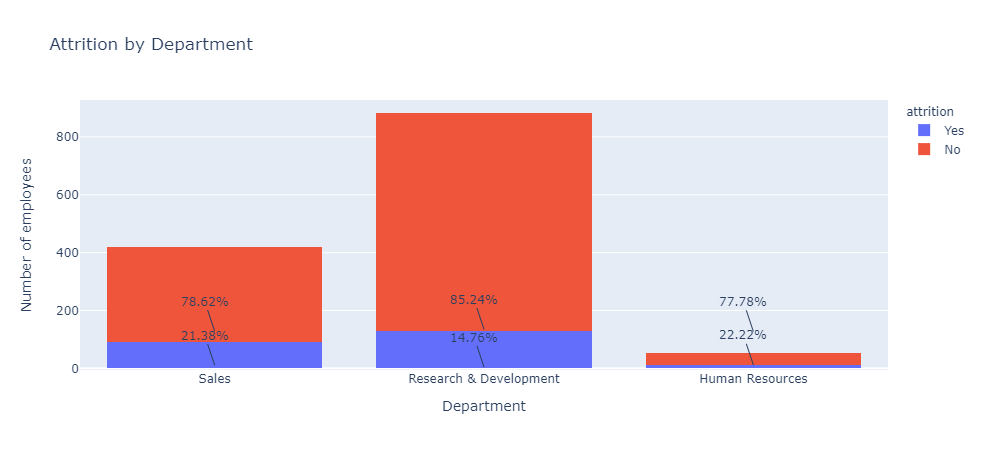

In [31]:
fig = px.histogram(new_df, x='department', color='attrition', title='Attrition by Department',
                   barmode="stack")

percentages = new_df.groupby(['department', 'attrition']).size() / new_df.groupby('department').size() * 100
for department, attrition, percentage in percentages.reset_index().values:
    if attrition == 'Yes':
        text = f'{percentage:.2f}%'
        fig.add_annotation(
            text=text,
            x=department,
            y=percentage-10,
            showarrow=True,)

    elif attrition == 'No':
        text = f'{percentage:.2f}%'
        fig.add_annotation(
            text=text,
            x=department,
            y=percentage+50,
            showarrow=True)

fig.update_layout(
    xaxis_title='Department',
    yaxis_title='Number of employees')
#fig.update_layout(template="plotly_dark")
fig.show()


The attrition rate is consistant between departments, staying around the 80 - 85\% level.

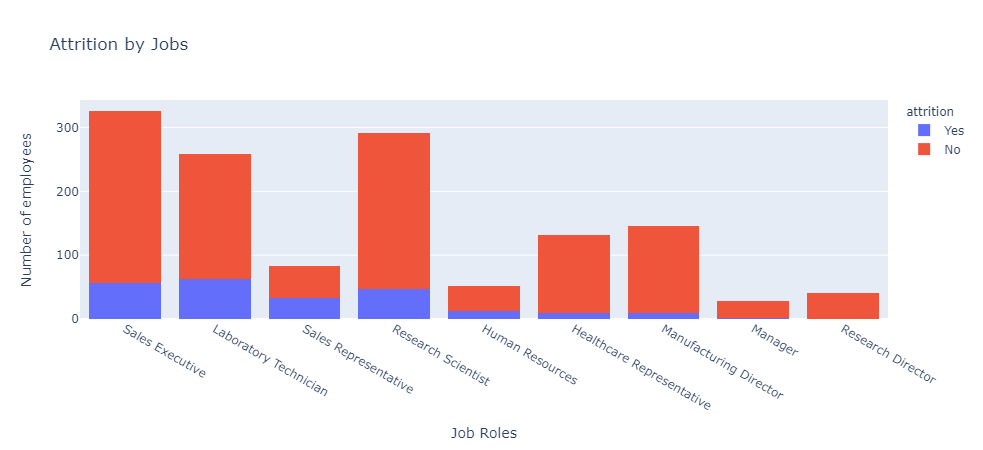

In [32]:
fig = px.histogram(new_df, x='job_role', color='attrition', title='Attrition by Jobs',
                   barmode="stack")

fig.update_layout(
    xaxis_title='Job Roles',
    yaxis_title='Number of employees')
#fig.update_layout(template="plotly_dark")
fig.show()


The attrition rate is specifically lower for the following positions: Research and Manufacturing Directors, Managers, HR and Healthcare representatives.

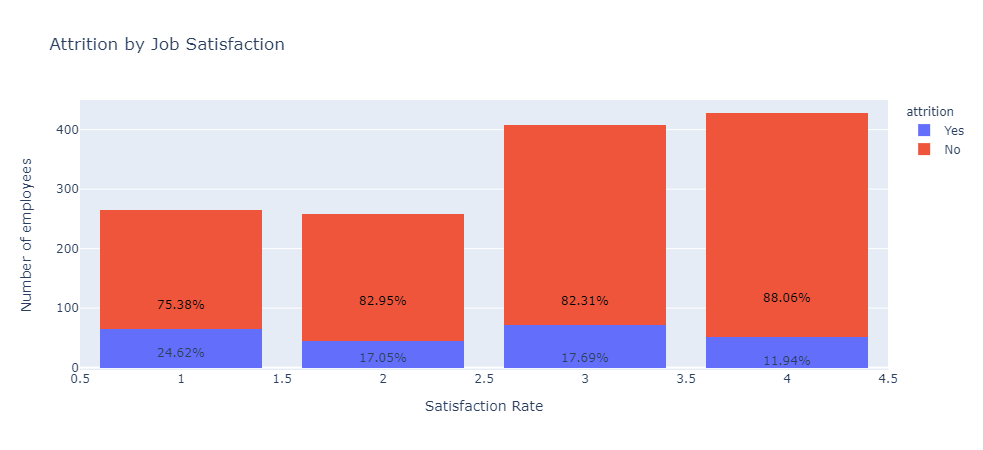

In [33]:
fig = px.histogram(new_df, x='job_satisfaction', color='attrition', title='Attrition by Job Satisfaction',
                   barmode="stack")

percentages = new_df.groupby(['job_satisfaction', 'attrition']).size() / new_df.groupby('job_satisfaction').size() * 100
for satisfaction, attrition, percentage in percentages.reset_index().values:
    if attrition == 'Yes':
        text = f'{percentage:.2f}%'
        fig.add_annotation(text=text,x=satisfaction,y=percentage,showarrow=False,)
    elif attrition == 'No':
        text = f'{percentage:.2f}%'
        fig.add_annotation(text=text,x=satisfaction,y=percentage + 30,showarrow=False,font={"color":"black"})

fig.update_layout(xaxis_title='Satisfaction Rate',
                  yaxis_title='Number of employees',
                  bargap=0.2)
fig.show()


From the chart, there is no evidence of job satisfaction affect attrition, which is surprising.

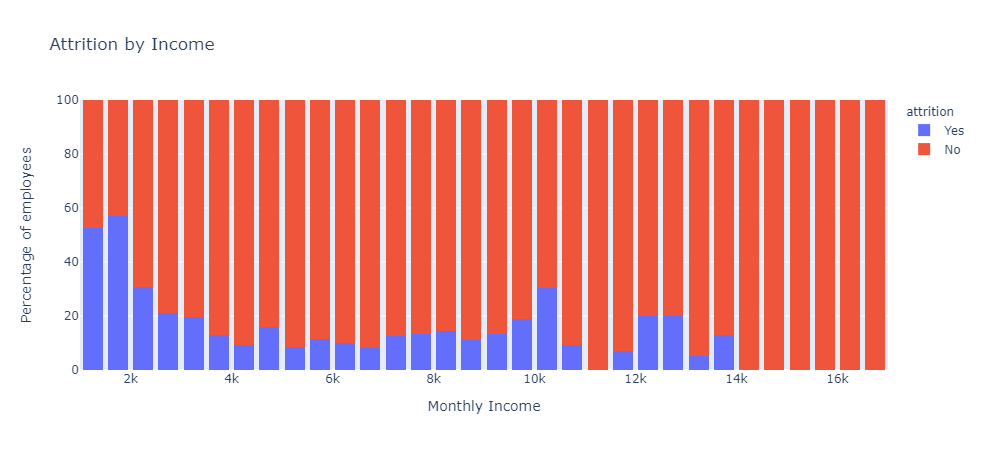

In [34]:
fig = px.histogram(new_df, x='monthly_income', color='attrition', title='Attrition by Income',
                   barmode="stack",labels={"monthly_income": "Monthly Income"},barnorm="percent")

fig.update_layout(xaxis_title='Monthly Income',
                  yaxis_title='Percentage of employees',
                  bargap=0.2)
fig.show()


It can be seen that the attrition rate is higher for employees who are paid lower, from \$2000 to \$4000.

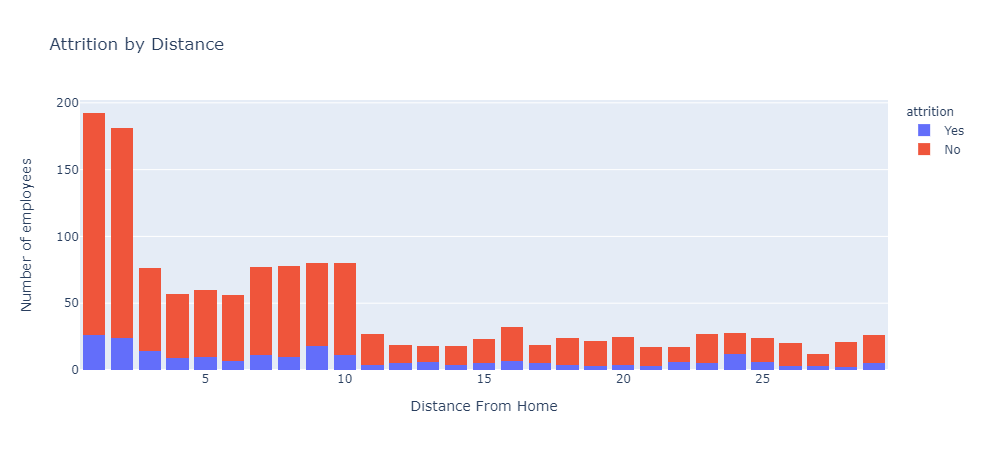

In [35]:
fig = px.histogram(new_df, x='distance_from_home', color='attrition', title='Attrition by Distance',
                   barmode="stack")
fig.update_layout(
    xaxis_title='Distance From Home',
    yaxis_title='Number of employees',
    bargap=0.2)
#fig.update_layout(template="plotly_dark")
fig.show()


The majority of employees stay within 10km of their workplace. However, there is no evidence supporting that attrition rate is higher for people living far from work. This can be seen from the following graph.

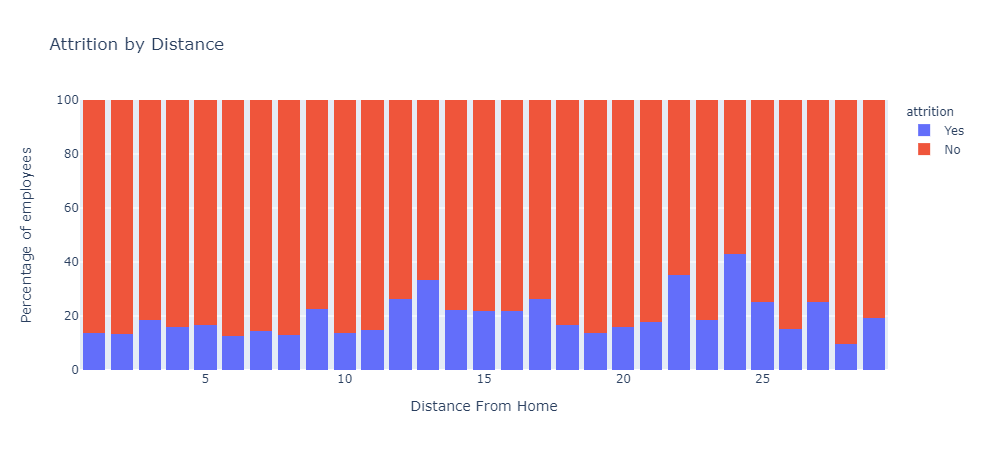

In [36]:
fig = px.histogram(new_df, x='distance_from_home', color='attrition', title='Attrition by Distance',
                   barmode="stack",barnorm="percent")

fig.update_layout(xaxis_title='Distance From Home',
                  yaxis_title='Percentage of employees',
                  bargap=0.2)
fig.show()

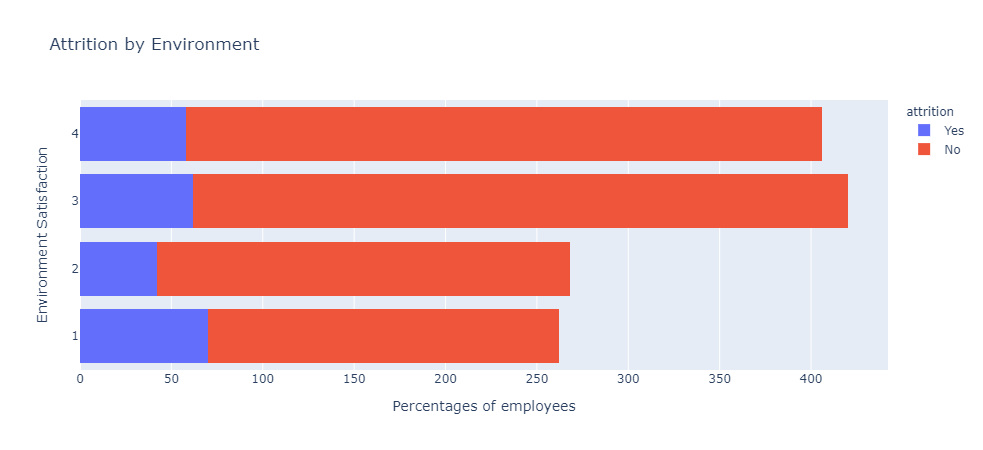

In [37]:
fig = px.histogram(new_df, y='environment_satisfaction', color='attrition', title='Attrition by Environment',
                   barmode="stack")

fig.update_layout(yaxis_title='Environment Satisfaction',
                  xaxis_title='Percentages of employees',
                  bargap=0.2)
fig.show()


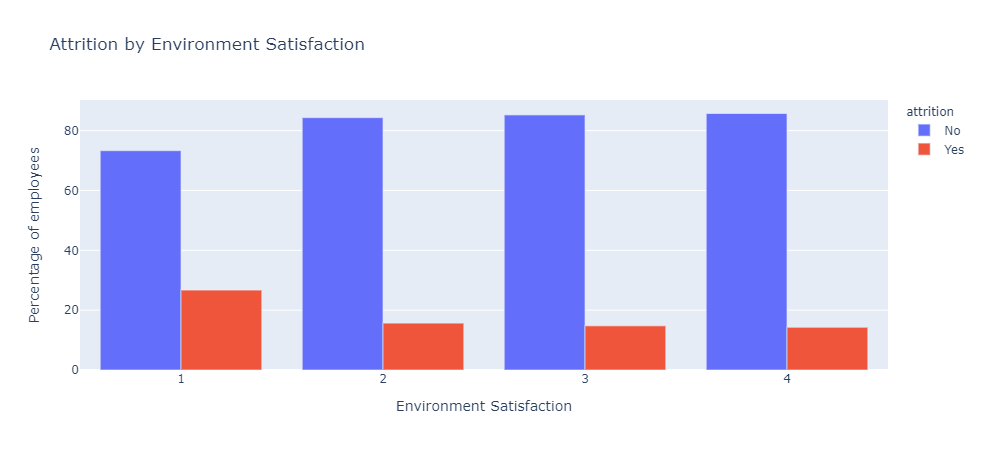

In [38]:
percentages = (new_df.groupby(['environment_satisfaction', 'attrition']).size() /
              new_df.groupby('environment_satisfaction').size() * 100)

fig = px.bar(percentages.reset_index(),
            x='environment_satisfaction',
            y=0,
            color='attrition',
            title='Attrition by Environment Satisfaction',
            barmode='group'
            )

fig.update_layout(xaxis_title='Environment Satisfaction',yaxis_title='Percentage of employees')

fig.show()

From the chart, there is no difference in attrition rate between most of the levels of Enviroment satisfaction, apart from that of the lowest level, whose proportion almost doubles that of others

# **6. Machine Learning Model**

## 6.1. Feature Engineering

In [39]:
new_df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,4,1,6,3,3,2,2,2,2


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

### Encode Non-Numeric Variables

In [41]:
df1=new_df.copy()

In [42]:
le = LabelEncoder()

for i in df1.columns:
    if df1[i].dtype == 'object':
        df1[i] = le.fit_transform(df1[i])

In [43]:
df1

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,36,0,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,1,17,3,3,5,2,0,3
1352,39,0,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,1,1,9,5,3,7,7,1,7
1353,27,0,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,2,1,6,0,3,6,2,0,3
1354,49,0,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,4,0,17,3,2,9,6,0,8


### Standardize Numeric Variables

In [44]:
scaler = StandardScaler()
scaler.fit(df1.drop('attrition',axis=1))

StandardScaler()

In [45]:
scaled_features_df1 = scaler.transform(df1.drop('attrition',axis=1))
df1_feat = pd.DataFrame(scaled_features_df1, columns=df1.drop('attrition',axis=1).columns)
df1_feat.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,0.56,0.60,0.74,1.39,-1.03,-0.88,-0.94,-0.66,-1.22,1.38,0.38,0.18,0.98,1.15,1.22,0.15,0.72,2.16,1.59,-1.16,-1.57,-0.93,-0.31,-2.16,-2.48,-0.07,-0.01,-0.67,0.31
1,1.47,-0.90,-1.30,-0.51,-0.17,-1.86,-0.94,0.26,0.82,-0.25,-1.02,0.18,0.58,-0.67,-0.14,-0.11,1.48,-0.66,-0.63,2.13,1.20,0.23,-0.01,0.16,0.34,0.70,0.87,-0.33,0.90
2,0.11,0.60,1.42,-0.51,-0.90,-0.88,1.30,1.18,0.82,1.29,-1.02,-1.00,-0.99,0.24,1.22,-1.03,-1.68,1.35,1.59,-0.07,-0.65,-0.93,-0.46,0.16,0.34,-1.23,-1.18,-0.67,-1.15
3,-0.35,-0.90,1.46,-0.51,-0.78,1.06,-0.94,1.18,-1.22,-0.49,0.38,-1.00,0.58,0.24,-0.14,-0.78,1.24,-0.66,1.59,-1.16,0.28,-0.93,-0.31,0.16,0.34,0.31,0.87,0.35,-1.15
4,-1.03,0.60,-0.52,-0.51,-0.90,-1.86,0.55,-1.57,0.82,-1.28,0.38,-1.00,-0.99,-0.67,-0.14,-0.61,0.32,2.56,-0.63,-0.89,1.20,0.23,-0.61,0.16,0.34,-0.84,-0.59,0.01,-0.56


### Create train and test splits

In [46]:
X = df1_feat
y = df1['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6.2. Model Comparison

In [47]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), KNeighborsClassifier(), SVC(), GaussianNB(), SGDClassifier(), Perceptron()]

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Ada Boost', 'KNN', 'SVC', 'Naive Bayes', 'SGD Classifier', 'Perceptron']

accuracy = []
roc_auc = []

for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

    if hasattr(i, "predict_proba"):
        y_pred_proba = i.predict_proba(X_test)[:, 1]  # Use the probability of the positive class
        roc_auc.append(roc_auc_score(y_test, y_pred_proba))
    else:
        #roc_auc.append(None)
        y_pred_proba = i.decision_function(X_test)
        roc_auc.append(roc_auc_score(y_test, y_pred_proba))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,Model,Accuracy,ROC AUC
0,Logistic Regression,0.87,0.83
1,SVC,0.85,0.84
2,Gradient Boosting,0.85,0.81
3,Naive Bayes,0.85,0.82
4,KNN,0.85,0.72
5,Random Forest,0.84,0.80
6,Ada Boost,0.84,0.79
7,SGD Classifier,0.82,0.74
8,Decision Tree,0.79,0.65
9,Perceptron,0.74,0.67


Accuracy Testing is immediately suitable for the overall assessment of any algorithms in use. However, the metric is not perfectly applicable to imbalanced datasets. <br>
Therefore, ROC AUC (Area under Curve) metrics is brought up alongside to provide more precise insights into the accuracy of the learning model, especially with binary classification one as with the attrition feature of the dataset.

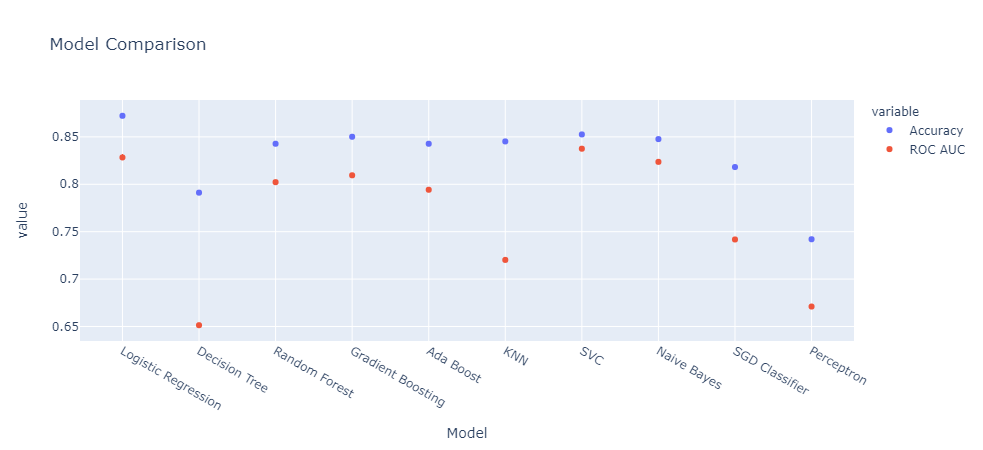

In [48]:
fig = px.scatter(model_comparison, x='Model', y=['Accuracy', 'ROC AUC'], title='Model Comparison')
fig.show()

It is immediately apparent that Logistic Regression and Random Forest (Classifier) methods both stand out with the highest score for overall accuracy testing. <br>
Aside from the non-negotiable selection of Logistic Regression, Random Forest is also opted for to investigate the difference between AUC indices despite resemblance in the other metrics

## 6.3. Model 1 - Random Forest

### Model Building & Feature Importance Analysis

Accuracy Score: 0.8427518427518428

ROC AUC Score: 0.7690308517773308


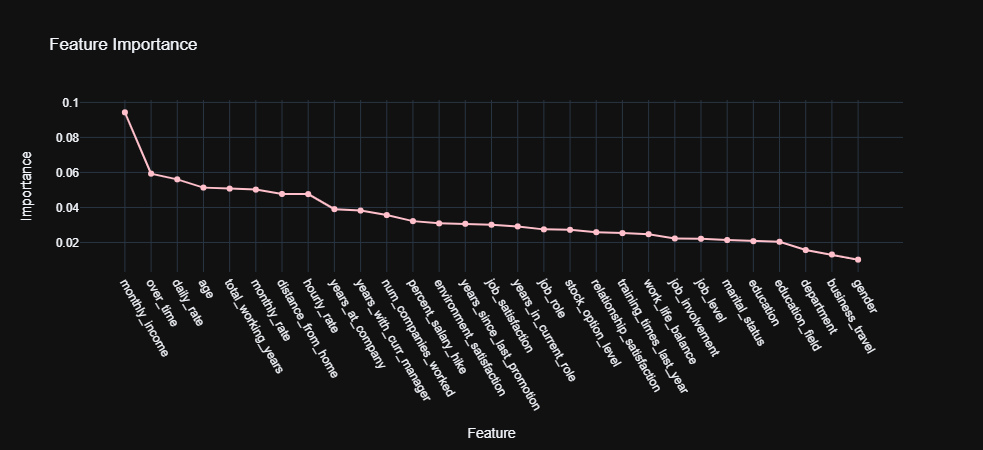

<Figure size 1000x500 with 0 Axes>

In [49]:
model = RandomForestClassifier(max_features='sqrt', n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}")

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance

plt.figure(figsize=(10, 5))
fig = px.line(x=feature_importance['Feature'], y=feature_importance['Importance'], markers="o",title="Feature Importance",template="plotly_dark",color_discrete_sequence=['pink'])
fig.update_layout(
    xaxis_title="Feature",
    yaxis_title="Importance",
    font={"family":"Arial", "size":12})

fig.update_xaxes(tickangle=60)

fig.show()

Overall, a great number of features have direct yet insignificant influence on the risk of voluntary departure. Most noticeable correlation coefficients range any where below 0.1, with monthly_income taking the lead.

### Predicting Most Risky Personels

In [50]:

rf = RandomForestClassifier(max_features='sqrt', n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


y_pred_prob = rf.predict_proba(X_test)

y_pred_prob = y_pred_prob[:, 1]

y_pred_prob = pd.DataFrame(y_pred_prob)

y_pred_prob.columns = ['Probability']

y_pred_prob['Attrition Prediction'] = np.array(y_pred)

y_pred_prob['True Value'] = np.array(y_test)
y_pred_prob['Employee ID'] = X_test.index

y_pred_prob = y_pred_prob.sort_values(by='Probability', ascending=False)

y_pred_prob = y_pred_prob.reset_index(drop=True)

y_pred_prob

,Probability,Attrition Prediction,True Value,Employee ID
0,0.84,1,1,427
1,0.62,1,1,676
2,0.58,1,1,923
3,0.58,1,1,1208
4,0.55,1,1,605
...,...,...,...,...
402,0.01,0,0,1125
403,0.01,0,0,265
404,0.01,0,0,828
405,0.00,0,0,788


### Model Evaluation

In [51]:
import plotly.graph_objects as go

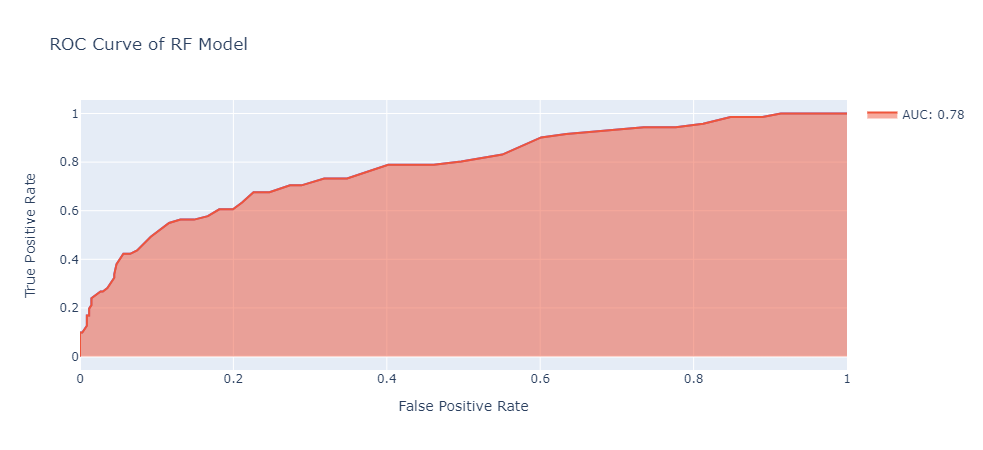

In [52]:
# Plot ROC curve and AUC score of RF Model
fpr, tpr, threshold = roc_curve(y_test,rf.predict_proba(X_test)[:,1])

fig = px.line(x=fpr,y=tpr,
        title="ROC Curve of RF Model",
        #color_discrete_sequence=["pink"],
        #template="plotly_dark"
              )

fig.update_layout(xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",)

fig.add_trace(go.Scatter(x=fpr, y=tpr, fill='tozeroy',name=f"AUC: {roc_auc_score(y_test,rf.predict_proba(X_test)[:,1]):.2f}"))
fig.show()

Having a closer look at the ROC AUC index, we can notice the pronounced pattern of trade-off between TPR and FPR at different thresholds of testing, all of which accrue up to a whopping 0.8 in aggregate area.

### Confusion Matrix

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

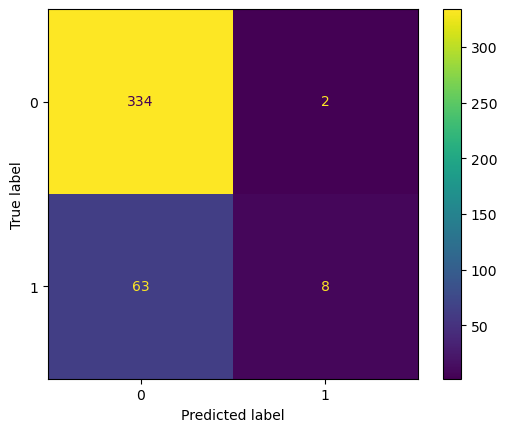

In [54]:
RF_co_ma = confusion_matrix(y_test, y_pred)
RF_co_ma = ConfusionMatrixDisplay(confusion_matrix = RF_co_ma)
RF_co_ma.plot()

Confusion matrix show the false positive and false negative rate as followed:
- False positive: 2
- False negative: 61
- True positive: 10
- True negative: 334
<br>

Hereby, further calculations of accuracy including precision, recall and f1-score can be conducted.



### Classification Report

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           0       0.84      0.99      0.91       336

           1       0.80      0.11      0.20        71



    accuracy                           0.84       407

   macro avg       0.82      0.55      0.55       407

weighted avg       0.83      0.84      0.79       407




The Recall and F1-Score are relatively low, which can be attributed to the imbalance between negative and positive value of the feature in the examined dataset.

## 6.4. Model 2 - Logistic Regression

In [56]:
df2 = new_df.copy()

In [57]:
df2.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,4,1,6,3,3,2,2,2,2


### Encoding Non-Numeric Features

In [58]:
def dummies(df):
	list=[]
	for col in df.select_dtypes(exclude=np.number).columns:
		dummy = pd.get_dummies(df[col],prefix=col,drop_first=True)
		list.append(dummy)

	df=df.drop([i for i in df.select_dtypes(exclude=np.number).columns],axis=1)

	for dummy_df in list:
		df=pd.concat([df,dummy_df],axis=1)
	return df

In [59]:
df2 = dummies(df2)

In [60]:
df2.head()

,age,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition_Yes,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Research & Development,department_Sales,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,gender_Male,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Married,marital_status_Single,over_time_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [61]:
df2.shape

(1356, 44)

### Standardizing Numeric Variables

In [62]:
scaler = StandardScaler()

In [63]:
scaler.fit(df2.drop('attrition_Yes',axis=1))

StandardScaler()

In [64]:
scaled_features_df2 = scaler.transform(df2.drop('attrition_Yes',axis=1))

In [65]:
df2_feat = pd.DataFrame(scaled_features_df2,columns=df2.drop("attrition_Yes",axis=1).columns)
df2_feat.head()

,age,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Research & Development,department_Sales,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,gender_Male,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Married,marital_status_Single,over_time_Yes
0,0.56,0.74,-1.03,-0.88,-0.66,1.38,0.38,0.18,1.15,0.15,0.72,2.16,-1.16,-1.57,-0.93,-0.31,-2.16,-2.48,-0.07,-0.01,-0.67,0.31,-0.49,0.65,-1.36,1.49,1.19,-0.35,-0.67,-0.24,-0.32,-1.22,-0.20,-0.49,-0.15,-0.35,-0.17,-0.52,1.78,-0.26,-0.91,1.43,1.59
1,1.47,-1.30,-0.17,-1.86,0.26,-0.25,-1.02,0.18,-0.67,-0.11,1.48,-0.66,2.13,1.20,0.23,-0.01,0.16,0.34,0.70,0.87,-0.33,0.90,2.04,-1.54,0.73,-0.67,1.19,-0.35,-0.67,-0.24,-0.32,0.82,-0.20,-0.49,-0.15,-0.35,-0.17,1.91,-0.56,-0.26,1.10,-0.70,-0.63
2,0.11,1.42,-0.90,-0.88,1.18,1.29,-1.02,-1.00,0.24,-1.03,-1.68,1.35,-0.07,-0.65,-0.93,-0.46,0.16,0.34,-1.23,-1.18,-0.67,-1.15,-0.49,0.65,0.73,-0.67,-0.84,-0.35,-0.67,4.10,-0.32,0.82,-0.20,2.06,-0.15,-0.35,-0.17,-0.52,-0.56,-0.26,-0.91,1.43,1.59
3,-0.35,1.46,-0.78,1.06,1.18,-0.49,0.38,-1.00,0.24,-0.78,1.24,-0.66,-1.16,0.28,-0.93,-0.31,0.16,0.34,0.31,0.87,0.35,-1.15,2.04,-1.54,0.73,-0.67,1.19,-0.35,-0.67,-0.24,-0.32,-1.22,-0.20,-0.49,-0.15,-0.35,-0.17,1.91,-0.56,-0.26,1.10,-0.70,1.59
4,-1.03,-0.52,-0.90,-1.86,-1.57,-1.28,0.38,-1.00,-0.67,-0.61,0.32,2.56,-0.89,1.20,0.23,-0.61,0.16,0.34,-0.84,-0.59,0.01,-0.56,-0.49,0.65,0.73,-0.67,-0.84,-0.35,1.48,-0.24,-0.32,0.82,-0.20,2.06,-0.15,-0.35,-0.17,-0.52,-0.56,-0.26,1.10,-0.70,-0.63


### Train Split Test

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df2_feat,
                                                    df2['attrition_Yes'], test_size=0.3,
                                                    random_state=101)

### Training And Predicting

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

### Analysing Feature Importance

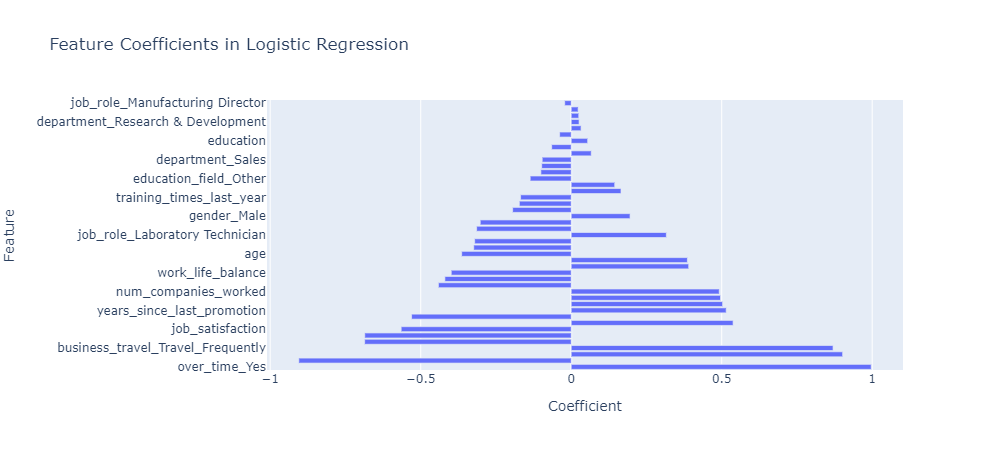

In [70]:
feature_importance = logmodel.coef_[0]

feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})

importance_df = importance_df.reindex(importance_df['Coefficient'].abs().sort_values(ascending=False).index).reset_index(drop=True)

import plotly.express as px

fig = px.bar(
    importance_df,
    x='Coefficient',
    y='Feature',
    orientation='h',
    title='Feature Coefficients in Logistic Regression',
    #template='plotly_dark'
)

fig.show()

In [71]:
importance_df.head(10)

,Feature,Coefficient
0,over_time_Yes,1.00
1,job_role_Research Director,-0.91
2,years_at_company,0.90
3,business_travel_Travel_Frequently,0.87
4,years_in_current_role,-0.69
5,years_with_curr_manager,-0.69
6,job_satisfaction,-0.56
7,marital_status_Single,0.54
8,environment_satisfaction,-0.53
9,years_since_last_promotion,0.51


In [72]:
importance_df.loc[importance_df["Feature"]=="monthly_income"]

,Feature,Coefficient
37,monthly_income,-0.04


### Predict Most Risky Personels

In [73]:
predictions = logmodel.predict(X_test)

In [74]:
predictions_prob = logmodel.predict_proba(X_test)

In [75]:
pred_prob=predictions_prob[:,1]

pred_prob = pd.DataFrame(pred_prob,columns=["Probability of Attrition"])

pred_prob["Predicted Attrition"]=predictions

pred_prob["Employee ID"] = X_test.index


In [76]:
pred_prob = pred_prob.sort_values(by="Probability of Attrition",ascending=False)
pred_prob.reset_index(inplace=True,drop=True)
pred_prob


,Probability of Attrition,Predicted Attrition,Employee ID
0,0.98,1,835
1,0.97,1,25
2,0.97,1,421
3,0.96,1,605
4,0.93,1,118
...,...,...,...
402,0.00,0,313
403,0.00,0,1320
404,0.00,0,198
405,0.00,0,630


### Model Evaluation

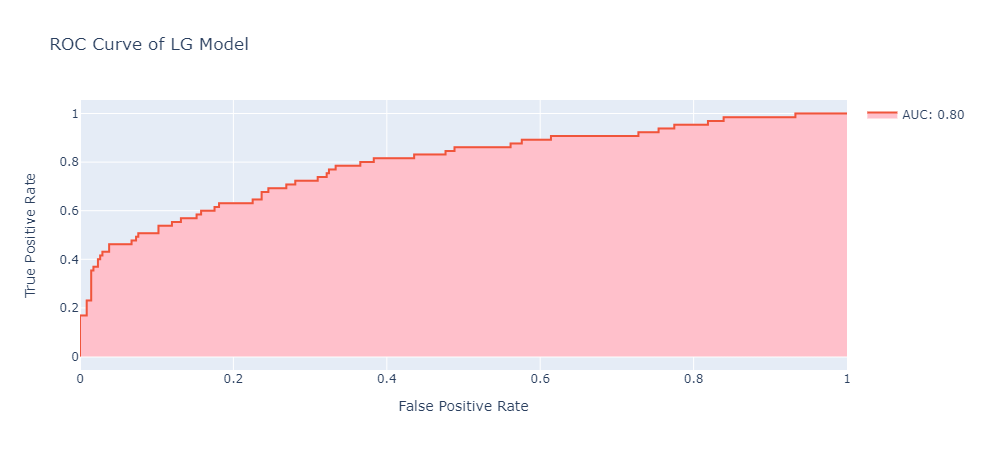

In [77]:
# Plot ROC curve and AUC score of LG Model
fpr, tpr, threshold = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])

fig = px.line(x=fpr,y=tpr,
        title="ROC Curve of LG Model",
        color_discrete_sequence=["pink"],
        #template="plotly_dark"
              )

fig.update_layout(xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",)

fig.add_trace(go.Scatter(x=fpr, y=tpr, fill='tozeroy', fillcolor='pink',name=f"AUC: {roc_auc_score(y_test,logmodel.predict_proba(X_test)[:,1]):.2f}"))
fig.show()

### Confusion Matrix

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

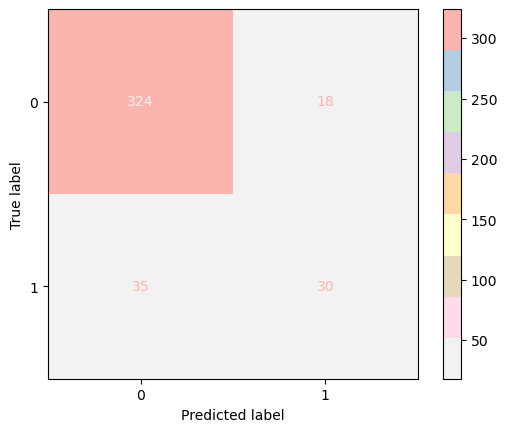

In [79]:
LG_co_ma = confusion_matrix(y_test, predictions)

LG_co_ma = ConfusionMatrixDisplay(confusion_matrix = LG_co_ma)

LG_co_ma.plot(cmap="Pastel1_r")

### Classification Report

In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support



           0       0.90      0.95      0.92       342

           1       0.62      0.46      0.53        65



    accuracy                           0.87       407

   macro avg       0.76      0.70      0.73       407

weighted avg       0.86      0.87      0.86       407




## 6.5 Model 3 - KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [101]:
error_df = pd.DataFrame({"Error Rate":error_rate,
                             "N_Neighbors":np.array(range(1,40))},
                       
                        )
error_df.head()

,Error Rate,N_Neighbors
0,0.19,1
1,0.16,2
2,0.16,3
3,0.15,4
4,0.15,5


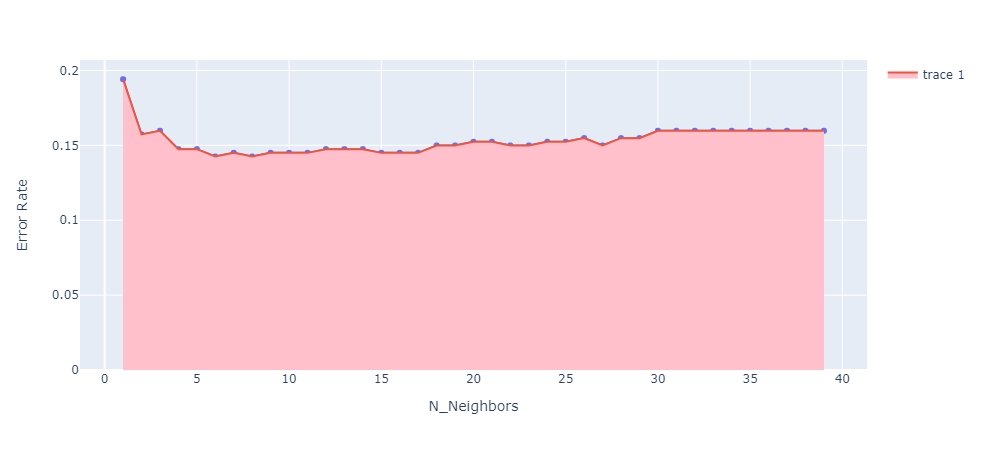

In [107]:
fig=px.line(data_frame=error_df,x="N_Neighbors",y="Error Rate",markers="o")

fig.add_trace(go.Scatter(y=error_df["Error Rate"],x=error_df["N_Neighbors"],fill="tozeroy",fillcolor="pink"))

In [112]:
error_df.sort_values(by="Error Rate",ascending=True).head(5)

,Error Rate,N_Neighbors
5,0.14,6
7,0.14,8
15,0.14,16
16,0.14,17
14,0.14,15


In [114]:
knn = KNeighborsClassifier(n_neighbors=6)

In [115]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [117]:
pred_knn = knn.predict(X_test)

pred_knn_df = pd.DataFrame({"Predicted Values":pred_knn,
                            "ID":y_test.index})

pred_knn_df.head()

,Predicted Values,ID
0,0,247
1,0,573
2,0,1042
3,0,1047
4,0,1240


In [125]:
from sklearn.inspection import permutation_importance

# Fit your KNN model
knn.fit(X_train, y_train)

# Calculate permutation importances
perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=0)

# Get the importances and feature names
importances = perm_importance.importances_mean
feature_names = X_test.columns

# Create a DataFrame to display the results
importance_df_knn = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df_knn.sort_values(by='Importance', ascending=False, inplace=True)

In [127]:
importance_df_knn.head()

,Feature,Importance
39,job_role_Sales Representative,0.01
2,distance_from_home,0.01
22,business_travel_Travel_Frequently,0.01
8,job_satisfaction,0.01
14,stock_option_level,0.01


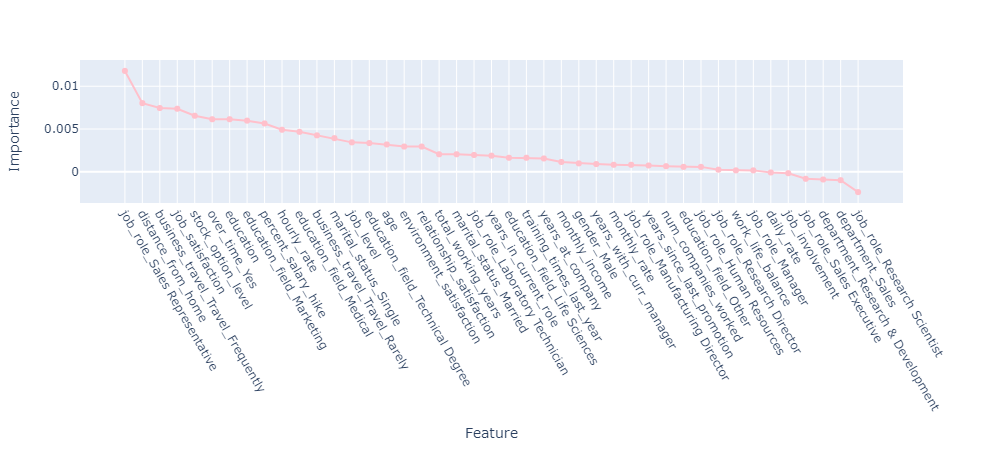

In [131]:
fig = px.line(data_frame=importance_df_knn,x="Feature",y="Importance",markers="o",
              color_discrete_sequence=['pink'])

fig.update_layout(xaxis_title="Feature",
    yaxis_title="Importance",)
fig.update_xaxes(tickangle=60)
fig.show()

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay

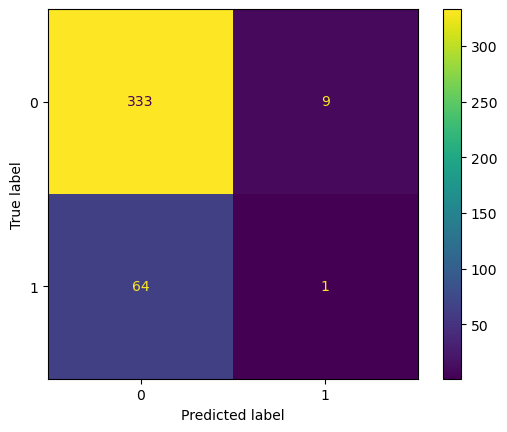

In [133]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred)).plot()

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           0       0.84      0.97      0.90       342

           1       0.10      0.02      0.03        65



    accuracy                           0.82       407

   macro avg       0.47      0.49      0.46       407

weighted avg       0.72      0.82      0.76       407


